In [1]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna
from gridworld import *
from plot import *
import optimize_steps
import optimize_episodes
import select_action
from sarsa import *
from qlearning import *
#from optimize import *

COUNT_ENVIRONMENT = 10

In [2]:
def load_study(study_name, storage):
    loaded_study = optuna.load_study(study_name=study_name, storage=storage)
    best_params = loaded_study.best_trial.params
    return best_params

In [3]:
Q_PARAMS_A1_decay_epsilon = load_study('qlearning_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_epsilon = load_study('qlearning_a1_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_ucb = load_study('qlearning_a1_ucb','sqlite:///hyperparameters_A1.db')

SARSA_PARAMS_A1_decay_epsilon = load_study('sarsa_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_epsilon = load_study('sarsa_a1_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_UCB = load_study('sarsa_a1_ucb','sqlite:///hyperparameters_A1.db')

In [4]:
SARSA_PARAMS_A2_decay_epsilon = load_study('sarsa_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_epsilon = load_study('sarsa_a2_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_UCB = load_study('sarsa_a2_ucb','sqlite:///hyperparameters_A2.db')


Q_PARAMS_A2_decay_epsilon = load_study('qlearning_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_epsilon = load_study('qlearning_a2_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_ucb = load_study('qlearning_a2_ucb','sqlite:///hyperparameters_A2.db')



In [64]:
#a1_env = Random(size=12, water=0.3, mountain=0)
a2_env = Random(size = 12, water=0, mountain=0.3)
for row in a2_env.grid:
    print(row)

['#', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'G', ' ', ' ', ' ', '#']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#', ' ']
['#', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#']
[' ', '#', ' ', '#', '#', '#', '#', ' ', '#', '#', '#', ' ']
[' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '#', '#', ' ', '#', ' ', '#']
[' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', '#', ' ', ' ']
[' ', '#', ' ', '#', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ']
['#', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#']
[' ', ' ', ' ', ' ', '#', ' ', ' ', 'S', ' ', '#', '#', ' ']


In [ ]:
study2 = optimize_episodes.optimize_episodes(a2_env)
#study2.study_qlearning_decay_epsilon("qlearning_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_qlearning_epsilon_greedy("qlearning_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")

#study2.study_sarsa_decay_epsilon("sarsa_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_sarsa_epsilon_greedy("sarsa_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_sarsa_ucb("sarsa_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_qlearning_ucb("qlearning_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")




#study = optimize_steps.optimize_steps(a1_env)
#study.study_qlearning_decay_epsilon("qlearning_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_sarsa_epsilon_greedy("sarsa_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")

#study.study_qlearning_epsilon_greedy("qlearning_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_qlearning_ucb("qlearning_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

#study.study_sarsa_decay_epsilon("sarsa_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_sarsa_ucb("sarsa_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

[I 2023-12-11 00:10:40,710] Using an existing study with name 'sarsa_a2_ucb' instead of creating a new one.


In [50]:
def eval(data):
    goal_dict = {}
    for i in data:
        first_goal = 0
        count_goal = 0
        steps = 0
        for keys in data[i]:
            steps += data[i][keys][0]
            if data[i][keys][2] and first_goal == 0:
                first_goal = keys
                
            if data[i][keys][2]:
                count_goal += 1
                
        goal_dict[i] = [first_goal, count_goal, steps/len(data[i].keys())]
        
    goal_dict = average_dict_elementwise(goal_dict)
    return goal_dict

        
def average_dict_elementwise(input_dict):
    # Check if the dictionary is not empty
    if not input_dict:
        return {}
    
    # Get the length of the lists in the dictionary
    list_length = len(next(iter(input_dict.values())))
    
    # Initialize a dictionary to store the averages
    average_dict = {}
    
    # Iterate over the lists element-wise and calculate the average
    for i in range(list_length):
        # Extract the i-th element from each list and calculate the average
        average_dict[i] = sum(input_dict[key][i] for key in input_dict) / len(input_dict)
    
    return average_dict

In [52]:
def print_stats(stats, caption):
    print(caption)
    print(f"Found the target for the first on average in Episode {stats[0]}")
    print(f"Found the target on average {stats[1]} times")
    print(f"Average Episode length: {stats[2]}")

# Plot 1: Cumulative reward of the current episode over episodes

In [5]:
qlearning_data={}
sarsa_data={}
qlearning_data_no_decay={}
sarsa_data_no_decay={}
qlearning_data_ucb={}
sarsa_data_ucb={}
envs_A1 = []


q = qlearning(Q_PARAMS_A1_decay_epsilon['ALPHA'],
                  Q_PARAMS_A1_decay_epsilon['GAMMA'],
                  Q_PARAMS_A1_decay_epsilon['EPISODES'],
                  Q_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_decay_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_decay_epsilon['EPS'],
                  Q_PARAMS_A1_decay_epsilon['DECAY'])


q_no_decay = qlearning(Q_PARAMS_A1_epsilon['ALPHA'],
                  Q_PARAMS_A1_epsilon['GAMMA'],
                  Q_PARAMS_A1_epsilon['EPISODES'],
                  Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_epsilon['EPS'])

q_ucb = qlearning(Q_PARAMS_A1_ucb['ALPHA'],
          Q_PARAMS_A1_ucb['GAMMA'],
          Q_PARAMS_A1_ucb['EPISODES'],
          Q_PARAMS_A1_ucb['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_ucb['INIT_VALUE'],
          Q_PARAMS_A1_ucb['EPS']
          )

s = sarsa(SARSA_PARAMS_A1_decay_epsilon['ALPHA'],
          SARSA_PARAMS_A1_decay_epsilon['GAMMA'],
          SARSA_PARAMS_A1_decay_epsilon['EPISODES'],
          SARSA_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_decay_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A1_decay_epsilon['EPS'],
          SARSA_PARAMS_A1_decay_epsilon['DECAY'])

s_no_decay = sarsa(Q_PARAMS_A1_epsilon['ALPHA'],
          Q_PARAMS_A1_epsilon['GAMMA'],
          Q_PARAMS_A1_epsilon['EPISODES'],
          Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_epsilon['INIT_VALUE'],
          Q_PARAMS_A1_epsilon['EPS'])

s_ucb = sarsa(SARSA_PARAMS_A1_UCB['ALPHA'],
          SARSA_PARAMS_A1_UCB['GAMMA'],
          SARSA_PARAMS_A1_UCB['EPISODES'],
          SARSA_PARAMS_A1_UCB['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_UCB['INIT_VALUE'],
          SARSA_PARAMS_A1_UCB['EPS']
          )


for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0.3, mountain=0)
    envs_A1.append(env)     
    print(f"running environment: {i}")
    
    qlearning_data[i] = q.run_decay_epsilon_greedy(env)
    sarsa_data[i] = s.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay[i] = q_no_decay.run_epsilon_greedy(env)
    sarsa_data_no_decay[i] = s_no_decay.run_epsilon_greedy(env)
    
    qlearning_data_ucb[i] = q_ucb.run_ucb(env)
    sarsa_data_ucb[i] = s_ucb.run_ucb(env)


running environment: 0
running environment: 1
running environment: 2
running environment: 3
running environment: 4
running environment: 5
running environment: 6
running environment: 7
running environment: 8
running environment: 9


## Decaying Epsilon Greedy

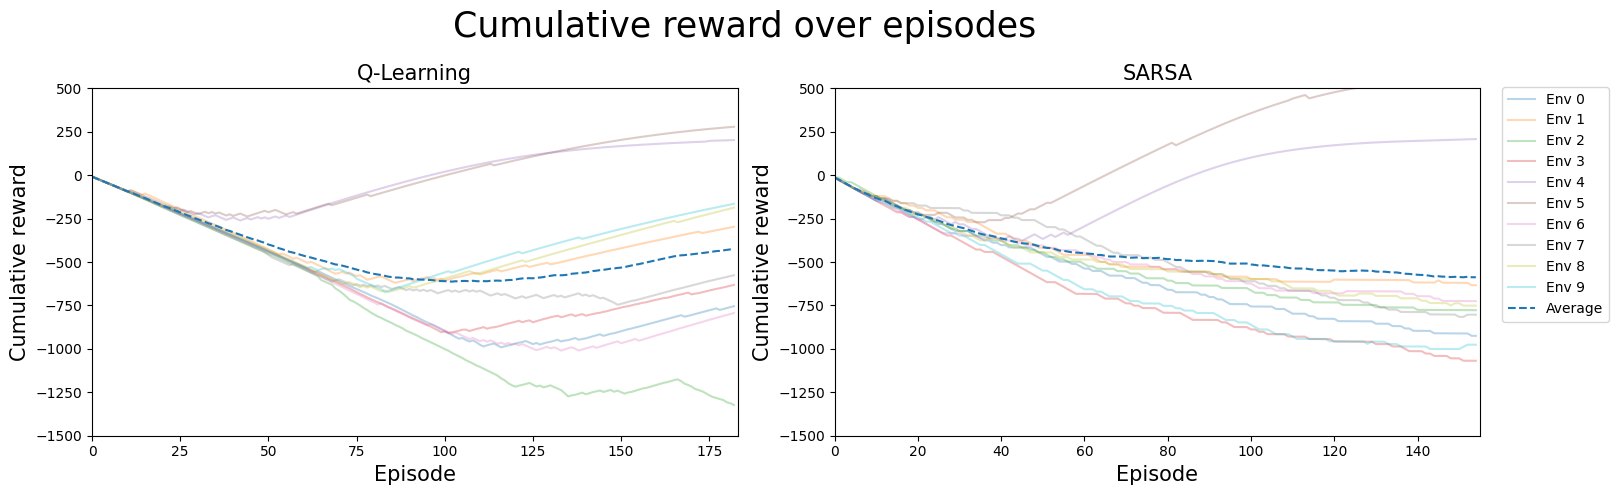

In [6]:
plot_episodes([qlearning_data, sarsa_data], [Q_PARAMS_A1_decay_epsilon['EPISODES'], SARSA_PARAMS_A1_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-1500,500])

In [53]:
print_stats(eval(qlearning_data), "Q-Learning with decaying Epsilon Greedy")
print()
print_stats(eval(sarsa_data), "SARSA decaying with decaying Epsilon Greedy")

Q-Learning with decaying Epsilon Greedy
Found the target for the first on average in Episode 55.1
Found the target on average 88.5 times
Average Episode length: 66.89508196721312

SARSA decaying with decaying Epsilon Greedy
Found the target for the first on average in Episode 60.8
Found the target on average 22.9 times
Average Episode length: 25.642580645161292


## Epsilon Greedy

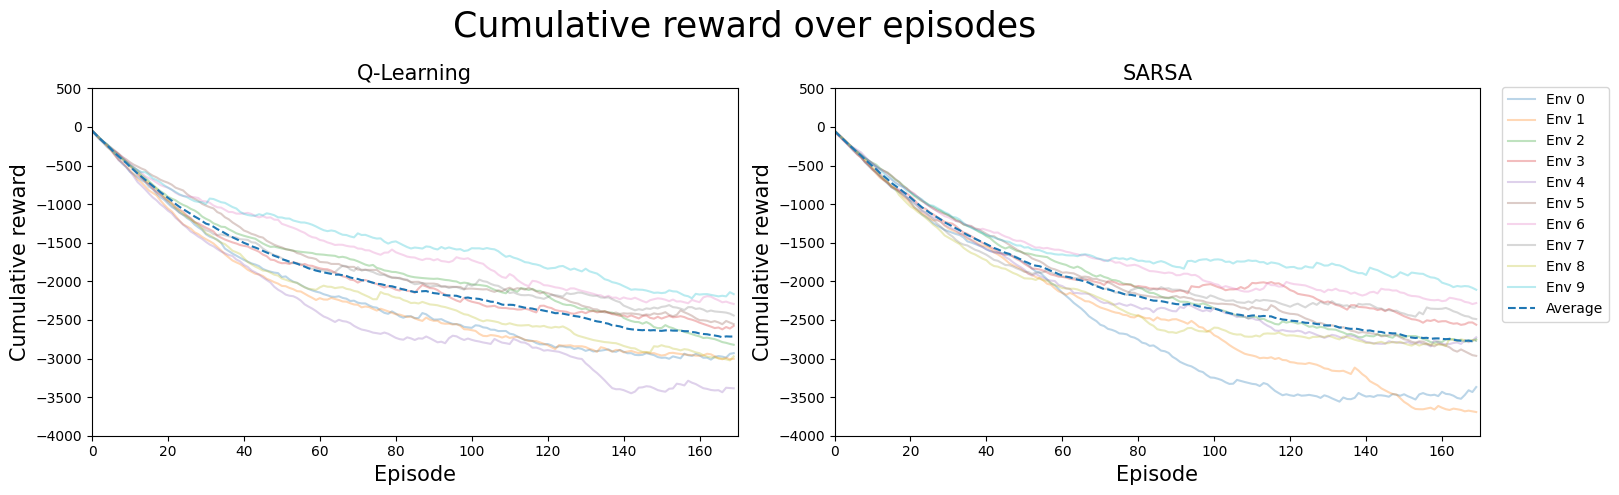

In [18]:
plot_episodes([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A1_epsilon['EPISODES'], Q_PARAMS_A1_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-4000,500])

In [54]:
print_stats(eval(qlearning_data_no_decay), "Q-Learning with Epsilon Greedy")
print()
print_stats(eval(sarsa_data_no_decay), "SARSA decaying with Epsilon Greedy")

Q-Learning with Epsilon Greedy
Found the target for the first on average in Episode 4.1
Found the target on average 0.3 times
Average Episode length: 2222.4600000000005

SARSA decaying with Epsilon Greedy
Found the target for the first on average in Episode 4.6
Found the target on average 4.2 times
Average Episode length: 2578.937647058824


# UCB

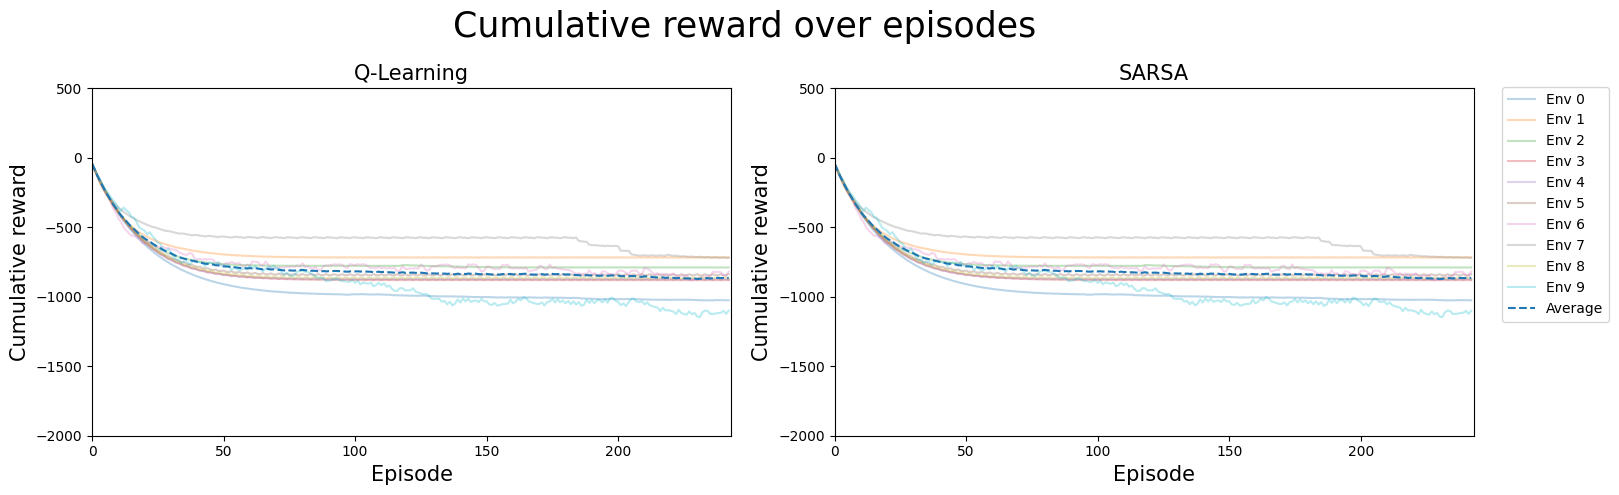

In [19]:
plot_episodes([qlearning_data_ucb, qlearning_data_ucb], [Q_PARAMS_A1_ucb['EPISODES'], Q_PARAMS_A1_ucb['EPISODES']], ['Q-Learning', 'SARSA'], [-2000,500])

In [58]:
print_stats(eval(qlearning_data_ucb), "Q-Learning with UCB1")
print()
print_stats(eval(qlearning_data_ucb), "SARSA decaying with UCB1")

Q-Learning with UCB1
Found the target for the first on average in Episode 0.4
Found the target on average 13.2 times
Average Episode length: 1321.661316872428

SARSA decaying with UCB1
Found the target for the first on average in Episode 0.4
Found the target on average 13.2 times
Average Episode length: 1321.661316872428


# Plot 2: Cumulative reward over amount of steps

In [44]:
qlearning_data_A2={}
sarsa_data_A2={}
qlearning_data_no_decay_A2={}
qlearning_data_ucb_A2={}
sarsa_data_ucb_A2 = {}
sarsa_data_no_decay_A2={}
envs2 = []

q2 = qlearning(Q_PARAMS_A2_decay_epsilon['ALPHA'],
                Q_PARAMS_A2_decay_epsilon['GAMMA'],
                Q_PARAMS_A2_decay_epsilon['EPISODES'],
                Q_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
                Q_PARAMS_A2_decay_epsilon['INIT_VALUE'],
                Q_PARAMS_A2_decay_epsilon['EPS'],
                Q_PARAMS_A2_decay_epsilon['DECAY'])

s2 = sarsa(SARSA_PARAMS_A2_decay_epsilon['ALPHA'],
            SARSA_PARAMS_A2_decay_epsilon['GAMMA'],
            SARSA_PARAMS_A2_decay_epsilon['EPISODES'],
            SARSA_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
            SARSA_PARAMS_A2_decay_epsilon['INIT_VALUE'],
            SARSA_PARAMS_A2_decay_epsilon['EPS'],
            SARSA_PARAMS_A2_decay_epsilon['DECAY'])

s_no_decay_2 = sarsa(SARSA_PARAMS_A2_epsilon['ALPHA'],
          SARSA_PARAMS_A2_epsilon['GAMMA'],
          SARSA_PARAMS_A2_epsilon['EPISODES'],
          SARSA_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A2_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A2_epsilon['EPS'])

q_no_decay_2 = qlearning(Q_PARAMS_A2_epsilon['ALPHA'],
                  Q_PARAMS_A2_epsilon['GAMMA'],
                  Q_PARAMS_A2_epsilon['EPISODES'],
                  Q_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_epsilon['INIT_VALUE'],
                  Q_PARAMS_A2_epsilon['EPS'])

q_ucb_2 = qlearning(Q_PARAMS_A2_ucb['ALPHA'],
                  Q_PARAMS_A2_ucb['GAMMA'],
                  Q_PARAMS_A2_ucb['EPISODES'],
                  Q_PARAMS_A2_ucb['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_ucb['INIT_VALUE'],
                  Q_PARAMS_A2_ucb['EPS'])

s_ucb_2 = qlearning(SARSA_PARAMS_A2_UCB['ALPHA'],
                  SARSA_PARAMS_A2_UCB['GAMMA'],
                  SARSA_PARAMS_A2_UCB['EPISODES'],
                  SARSA_PARAMS_A2_UCB['MAX_EPISODE_LENGTH'],
                  SARSA_PARAMS_A2_UCB['INIT_VALUE'],
                  SARSA_PARAMS_A2_UCB['EPS'])

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    print(f"running env: {i}")
    
    qlearning_data_A2[i] = q2.run_decay_epsilon_greedy(env)
    sarsa_data_A2[i] = s2.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay_A2[i] = q_no_decay_2.run_epsilon_greedy(env)
    sarsa_data_no_decay_A2[i] = s_no_decay_2.run_epsilon_greedy(env)
    
    #qlearning_data_ucb_A2[i] = q_ucb_2.run_ucb(env)
    #sarsa_data_ucb_A2[i] = s_ucb_2.run_ucb(env)



running env: 0
running env: 1
running env: 2
running env: 3
running env: 4
running env: 5
running env: 6
running env: 7
running env: 8
running env: 9


# Decaying Epsilon Greedy

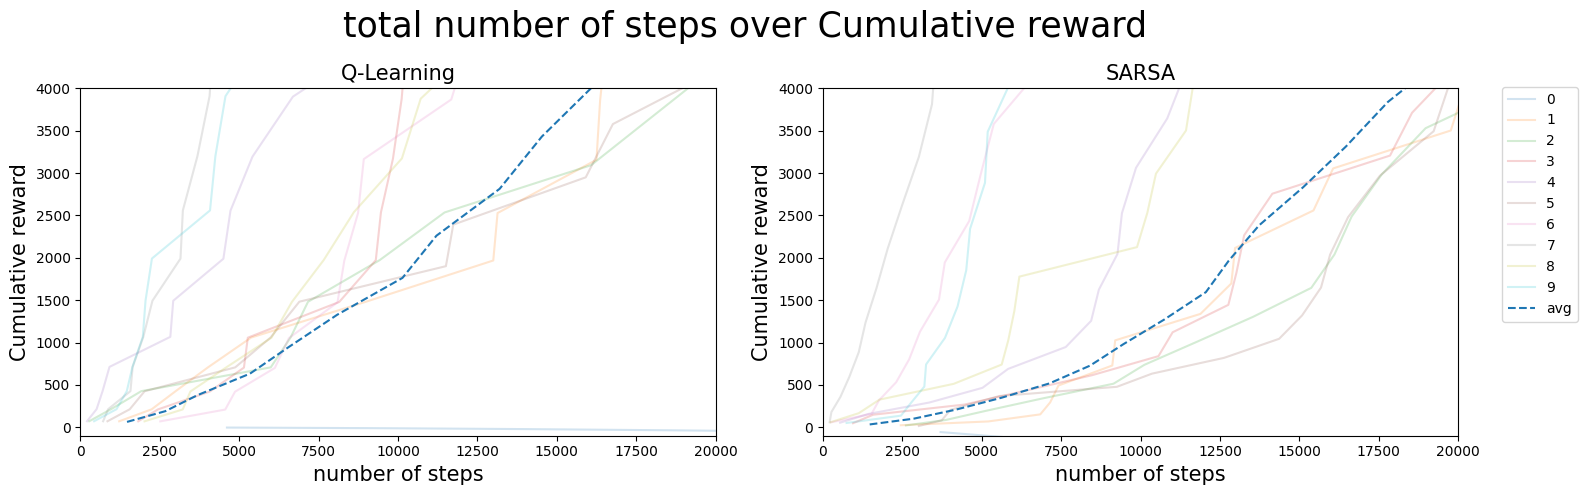

In [46]:
plot_steps([qlearning_data_A2, sarsa_data_A2], [Q_PARAMS_A2_decay_epsilon['EPISODES'], SARSA_PARAMS_A2_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-100,4000, 20000])

In [57]:
print_stats(eval(qlearning_data_A2), "Q-Learning with decaying Epsilon Greedy")
print()
print_stats(eval(sarsa_data_A2), "SARSA decaying with decaying Epsilon Greedy")

Q-Learning with decaying Epsilon Greedy
Found the target for the first on average in Episode 0.9
Found the target on average 3969.3 times
Average Episode length: 537.8425271739131

SARSA decaying with decaying Epsilon Greedy
Found the target for the first on average in Episode 0.9
Found the target on average 4482.2 times
Average Episode length: 427.9978953698136


# UCB

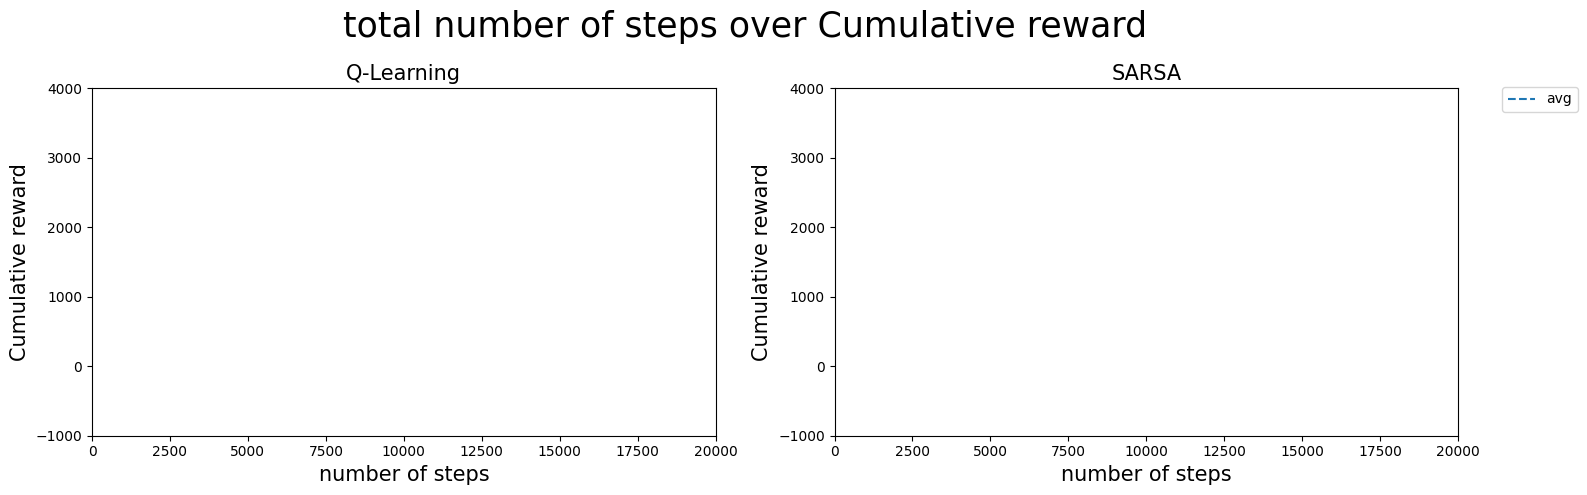

In [15]:
plot_steps([qlearning_data_ucb_A2, sarsa_data_ucb_A2], [Q_PARAMS_A2_ucb['EPISODES'], Q_PARAMS_A2_ucb['EPISODES']], ['Q-Learning', 'SARSA'])

In [ ]:
print_stats(eval(qlearning_data_ucb_A2), "Q-Learning with UCB1")
print()
print_stats(eval(sarsa_data_ucb_A2), "SARSA decaying with UCB1")

# Epsilon Greedy

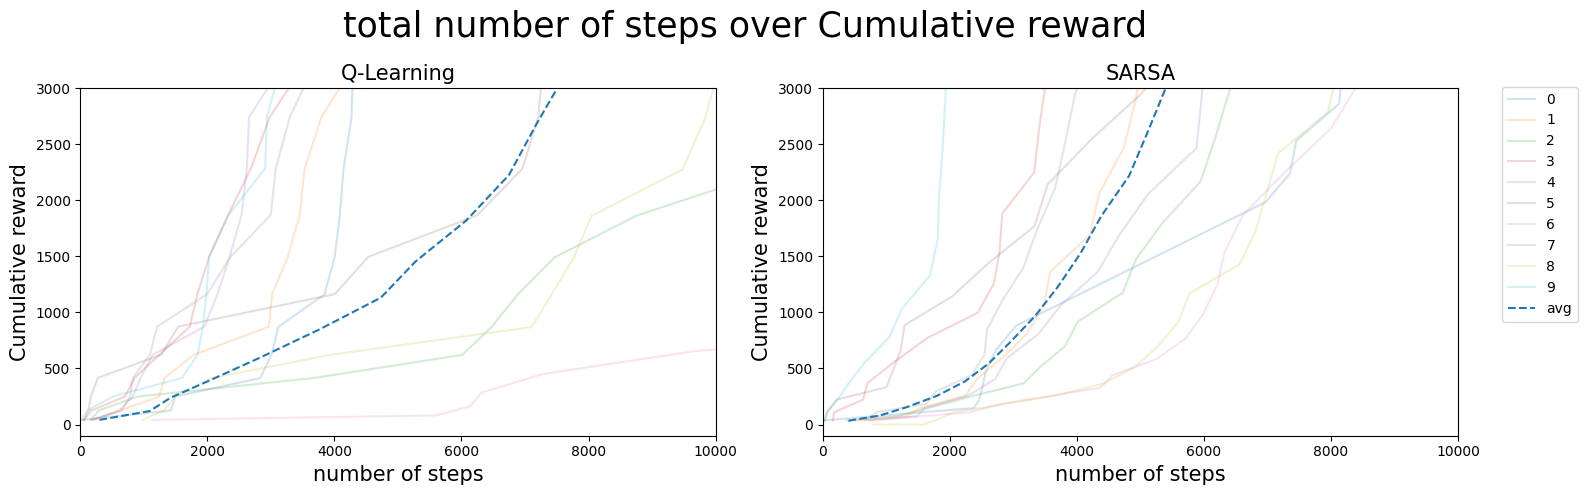

In [13]:
plot_steps([qlearning_data_no_decay_A2, sarsa_data_no_decay_A2], [Q_PARAMS_A2_epsilon['EPISODES'], SARSA_PARAMS_A2_epsilon['EPISODES']], ['Q-Learning', 'SARSA'],[-100,3000,10000])


In [ ]:
print_stats(eval(qlearning_data_ucb_A2), "Q-Learning with Epsilon Greedy")
print()
print_stats(eval(sarsa_data_ucb_A2), "SARSA decaying with Epsilon Greedy")